In [1]:
## Import Packages I will need
# Custom module which generates features.
from lex_processing import * 

import os

import pandas as pd
import numpy as np
from sklearn import linear_model

import matplotlib
import matplotlib.pyplot as plt
# To show plots in notebook
%matplotlib inline  

In [2]:
# Path is where the data I want to process is.
path = '/Users/Joe/dropbox/data/Edited Data/Presidents Data/ReaganSpeeches/'

In [3]:
df = pd.DataFrame()

In [4]:
for filename in os.listdir(path):
    if filename.endswith('txt'):
        f = open(path + filename)
        raw = f.read()
        # Clear raw of punctuation and tokenize for word counts.
        wordsNoPunct = strip_punctuation(raw)
        hesitations = wordsNoPunct.count('—')
        wordsNoPunct.replace("—", ' ')
        wordsNoPunct = word_tokenize(wordsNoPunct)
        
        
        
        words = word_tokenize(raw)
        sents = sent_tokenize(raw)
        processed = preprocess(raw)
        lex = lexical_diversity(wordsNoPunct)
        mls = meanLengthSentence(processed)
        brunets = BrunetsIndex(len(wordsNoPunct), len(set(wordsNoPunct)))
        wordDict = wordCount(processed)
        thetuple = {'Filename': filename, 'TTR': lex, 'Brunets': brunets,
                    'WordCount':len(wordsNoPunct), 
                    'UniqueWords':len(set(wordsNoPunct)), 'MLU': mls,
                    'Hesitations': hesitations}
        finalDict = {**thetuple, **wordDict}
        #df.loc[len(df)] = thetuple
        #temp_df = tempdf.append(thetuple, ignore_index = True)
        df = df.append(finalDict, ignore_index = True)

In [5]:
# Rearranging Columns
inserted_cols = ['Filename', 'TTR', 'Brunets','WordCount', 'UniqueWords', 'MLU', 'Hesitations']
cols = ([col for col in inserted_cols if col in df] 
        + [col for col in df if col not in inserted_cols])
df = df[cols]
#cols = ['Filename']  + [col for col in df if col != 'Filename']
#df = df[cols]

In [6]:
df = df.fillna(0)

In [7]:
list(df)

['Filename',
 'TTR',
 'Brunets',
 'WordCount',
 'UniqueWords',
 'MLU',
 'Hesitations',
 "''",
 ',',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WRB',
 '``',
 '$',
 'FW',
 'WP$']

In [8]:
df

,Filename,TTR,Brunets,WordCount,UniqueWords,MLU,Hesitations,'',",",.,...,VBN,VBP,VBZ,WDT,WP,WRB,``,$,FW,WP$
0,Reagan - Speech19 - Edited.txt,0.264011,14.072659,3515.0,928.0,23.938272,40.0,2.0,200.0,162.0,...,103.0,194.0,107.0,38.0,38.0,23.0,2.0,0.0,0.0,0.0
1,Reagan - Speech3 - Edited.txt,0.276809,13.794013,3497.0,968.0,23.625767,37.0,2.0,189.0,164.0,...,96.0,184.0,113.0,42.0,27.0,19.0,2.0,1.0,0.0,0.0
2,Reagan - Speech4 - Edited.txt,0.289337,13.722459,3076.0,890.0,27.136000,31.0,8.0,187.0,125.0,...,83.0,149.0,78.0,25.0,22.0,19.0,6.0,5.0,0.0,0.0
3,Reagan - Speech28 - Edited.txt,0.269267,14.120388,3153.0,849.0,25.492647,37.0,2.0,178.0,136.0,...,76.0,168.0,67.0,33.0,31.0,12.0,2.0,3.0,1.0,0.0
4,Reagan - Speech18 - Edited.txt,0.256569,14.309235,3387.0,869.0,20.551913,38.0,5.0,186.0,183.0,...,87.0,174.0,94.0,41.0,40.0,19.0,5.0,4.0,0.0,0.0
5,Reagan - Speech5 - Edited.txt,0.267256,13.950703,3622.0,968.0,24.570552,23.0,4.0,218.0,163.0,...,106.0,191.0,125.0,43.0,19.0,22.0,4.0,3.0,0.0,0.0
6,Reagan - Speech2 - Edited.txt,0.262053,14.113500,3526.0,924.0,24.287500,34.0,5.0,197.0,160.0,...,87.0,192.0,96.0,38.0,31.0,19.0,5.0,2.0,0.0,0.0
7,Reagan - Speech29 - Edited.txt,0.270229,14.040290,3275.0,885.0,21.520710,47.0,0.0,188.0,169.0,...,89.0,197.0,95.0,32.0,44.0,17.0,0.0,3.0,0.0,0.0
8,Reagan - Speech24 - Edited.txt,0.271889,13.912824,3472.0,944.0,23.763975,59.0,1.0,191.0,161.0,...,87.0,199.0,83.0,39.0,15.0,15.0,1.0,1.0,0.0,0.0
9,Reagan - Speech23 - Edited.txt,0.261132,14.085233,3638.0,950.0,24.662577,37.0,5.0,219.0,163.0,...,91.0,161.0,94.0,27.0,28.0,22.0,5.0,9.0,0.0,1.0


In [9]:
df.to_csv('test.csv')

In [10]:
testpath = '/Users/Joe/dropbox/'

In [11]:
a = pd.read_csv(testpath + "dates.csv")
b = pd.read_csv(testpath + "test.csv")

In [12]:
a['JDate'] = [datetime.datetime.strptime(x, '%d/%m/%Y') for x in a['Date']] 

In [13]:
a['Julian'] = [get_julian_datetime(x) for x in a['JDate']]

In [14]:
merged = a.merge(b, on='Filename')

merged = merged.drop(['Unnamed: 0'], axis=1)
merged = merged.drop(['Date'], axis=1)

In [15]:
merged = merged.sort_values(by=['JDate'])

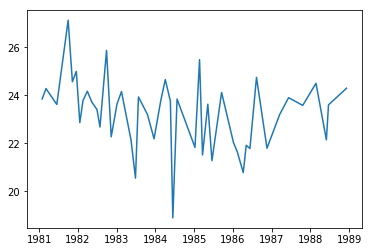

In [16]:
plt.plot(merged['JDate'], merged['MLU'])

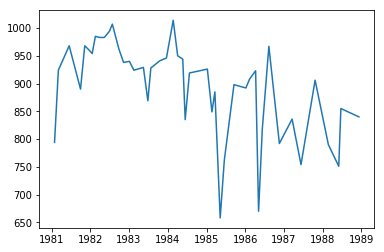

In [17]:
plt.plot(merged['JDate'], merged['UniqueWords'])

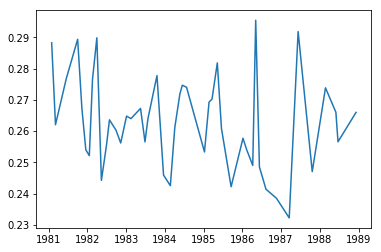

In [18]:
plt.plot(merged['JDate'], merged['TTR'])

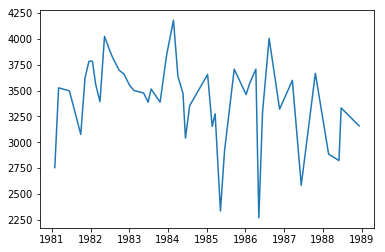

In [19]:
plt.plot(merged['JDate'], merged['WordCount'])

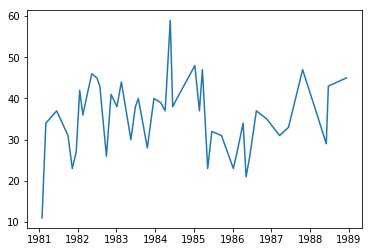

In [20]:
plt.plot(merged['JDate'], merged['Hesitations'])

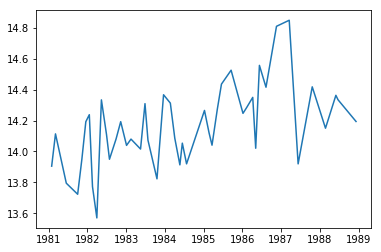

In [21]:
plt.plot(merged['JDate'], merged['Brunets'])

In [22]:
# Put the target in another DataFrame
target = pd.DataFrame(merged, columns=["Julian"])

In [23]:
# Define predictors and put them in X, define target and put them in Y
X = df[['TTR', 'Brunets','WordCount', 'UniqueWords', 'MLU', 'Hesitations']]
y = target[['Julian']]

In [24]:
# Generate basic linear model and use the predictors to generate a model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [25]:
# Get predictions based on the model
predictions = lm.predict(X)

In [26]:
# Get prediction score (1 to -1, 1 is best)
lm.score(X,y)

0.1627250751193835

In [27]:
# Print the coef
lm.coef_

array([[-3.35663726e+04, -5.01114619e+03,  5.80121823e+00,
        -3.03511565e+01, -1.04867617e+01, -1.41805440e+01]])

In [28]:
# Print the intercept
lm.intercept_

array([2533757.03337545])

In [30]:
from sklearn.gaussian_process import GaussianProcessRegressor
clf = GaussianProcessRegressor(random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X)

In [33]:
# This looks like too good a score.
# This is ridiculously overfit.
clf.score(X, y)

0.999999999999905

In [35]:
clf

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=42)